### 第 4 章 母集団と標本

2、3 章でやったのは、母集団であれ標本であれ手元にあるデータの集合を統計量を使って記述するという事。
この章では、大きな集団 (母集団) から取り出した幾つかの標本を元に、母集団の性質について推測する推測統計。

あとこの辺まで読んでびっくりしたのが、この本の中で「心理統計学の基礎 統合的理解のために」が何度も取り上げられている事。

In [17]:
#import statistics as stat
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 17 歳の日本人男性全体 (母集団) の標本として 10 個抽出
# その平均で母数の平均を推測する
h = np.array([165.2, 175.9, 161.7, 174.2, 172.1, 163.3, 170.9, 170.6, 168.4, 171.3])
h_ave = np.mean(h)
print(h_ave)

169.36


#### 推定量と 推定値
母集団の値 (母数) の推定の為に利用した、標本統計量を「推定量」と言う。上記の場合なら「算術平均値」を母数の推定量に使った、という事。

また実際に標本データを使って計算した値を「推定値」と言う。上記で言えば h_ave = 169.36 が推定値。

プログラミング的に表現するなら推定量は理論的に算出出来る「関数」で、推定値は「リテラル」。

In [18]:
# numpy で不偏分散を計算
h_var = np.var(h, ddof=1)
print(h_var)

# デフォルトだと標本分散になる
print(np.var(h))

21.6671111111
19.5004


In [19]:
# 乱数生成 numpy.random で出来る
# https://qiita.com/yubais/items/bf9ce0a8fefdcc0b0c97
from numpy.random import *
# 1 から 6 の整数の乱数を 1 つ生成
print(randint(1,6+1))
list(randint(1,6+1,20))

4


[2, 3, 4, 3, 1, 6, 3, 6, 6, 2, 6, 3, 2, 4, 1, 1, 5, 1, 5, 5]

In [20]:
from collections import Counter
counter = Counter(randint(1,6+1,6))
for word, cnt in counter.most_common():
    print(word,cnt)

print("\n")
counter100 = Counter(randint(1,6+1,1000000))
for word,cnt in counter100.most_common():
    print(word,cnt)

5 2
1 1
2 1
4 1
6 1


2 167127
4 166761
6 166677
3 166649
1 166457
5 166329


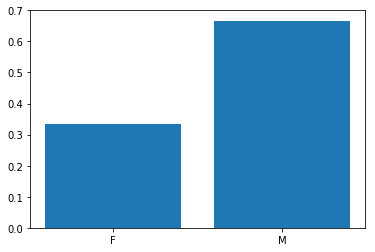

In [25]:
plt.bar(["M", "F"], [2/3, 1/3])
plt.show()

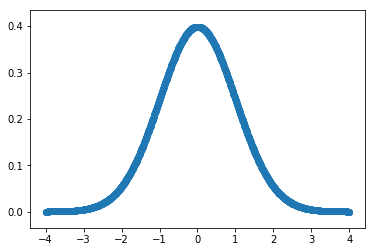

In [37]:
# 正規分布の確率密度関数
f = lambda x: (np.exp(-x**2/2)) / np.sqrt(2*np.pi)
n = 1000
p = [f(x) for x in np.linspace(-4,4,n)]
plt.scatter(np.linspace(-4,4,n),p)
plt.show()

[ 43.18817731  45.93021025  48.61258077  51.41517152  22.69788665]


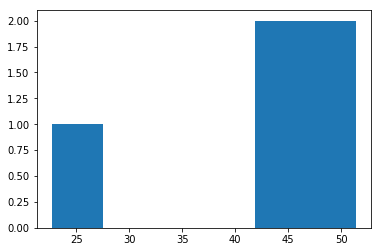

In [45]:
# 正規母集団から単純無作為抽出
# 平均 50、標準偏差 10、標本数 5
sample = normal(50, 10, 5)
print(sample)
plt.hist(sample,bins=6)
plt.show()

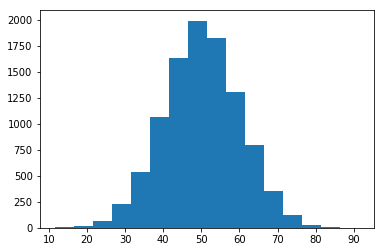

In [47]:
# 標本数 1万、中心極限定理が観察できる
sample2 = normal(50, 10, 10000)
plt.hist(sample2, bins=16)
plt.show()

In [51]:
# 母集団から単純無作為抽出で標本を複数回抽出しても、当然抽出されるものは同じではない
# したがって、抽出する度にその標本値 (たとえば平均値) は異なる
sample3 = normal(50, 10, 10)
sample4 = normal(50, 10, 10)
print(np.mean(sample3), sample3)
print(np.mean(sample4), sample4)

45.0366051714 [ 54.10431473  47.91864812  55.47318835  46.74851373  51.75296109
  57.33983397  36.11324872  35.29190763  24.09140537  41.53203001]
61.4958695533 [ 62.52188233  40.08330706  53.17507861  53.59026655  62.85203939
  59.70500566  64.5804723   70.17621897  74.42216631  73.85225834]


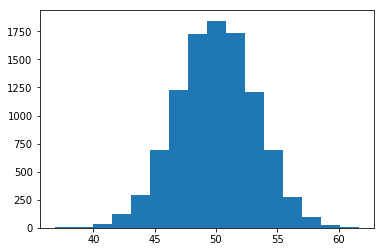

In [62]:
# 標本値の分布を求める
# 平均 50、標準偏差 10の正規母集団から標本数 10 の単純無作為抽出を 1 万回行なう
# それぞれの回の平均値を計算して、その平均値を分布を求める
s_ave = np.empty(10000)
for i in range(10000):
    s = normal(50, 10, 10)  # N=10でサンプリング
    s_ave[i] = np.mean(s)   # 標本平均を計算
plt.hist(s_ave, bins=16)
plt.show()

In [70]:
s_5 = abs(s_ave - np.array([50]))<5
cnt = Counter(s_5)
for word, cnt in cnt.most_common():
    print(word, cnt)
print(np.mean(s_ave))
print(np.var(s_ave))

True 8858
False 1142
50.0017853539
10.1963531462


In [72]:
# 標本分散と普遍分散の標本分布
c = 10000
s_var = np.empty(c)
s_uvar = np.empty(c)

for i in range(c):
    s = normal(50, 10, 10)
    s_var[i] = np.var(s)
    s_uvar[i] = np.var(s, ddof=1)
print(np.mean(s_var), np.mean(s_uvar))

89.9455442826 99.9394936473


In [74]:
print(np.std(s_var), np.std(s_uvar))

42.3424359641 47.0471510713


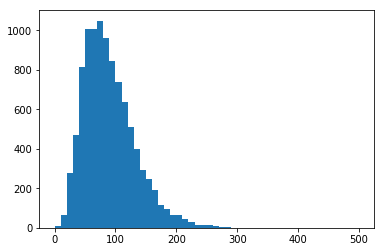

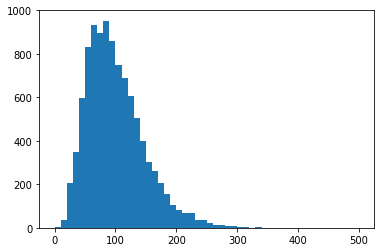

In [85]:
plt.hist(s_var,range=(0,500),bins=50)
plt.show()
plt.hist(s_uvar,range=(0,500),bins=50)
plt.show()

In [93]:
s_var100 = s_var>200
cnt = Counter(s_var100)
for w, c in cnt.most_common():
    print(w,c)
s_uvar100 = s_uvar>200
cnt2 = Counter(s_uvar100)
for w, c in cnt2.most_common():
    print(w,c)


False 9799
True 201
False 9639
True 361


In [96]:
print(np.mean(np.sqrt(s_uvar)))

9.72558172541


In [108]:
# 中央値の標本分布
s_ave = np.empty(c)
s_med = np.empty(c)
for i in range(c):
    s = normal(50, 10, 10)
    s_ave[i] = np.mean(s)
    s_med[i] = np.median(s)
print(np.mean(s_ave), np.mean(s_med))

49.7934955374 49.8567878207


In [111]:
print(np.std(s_ave), np.std(s_med))

3.12068896852 3.7639414451


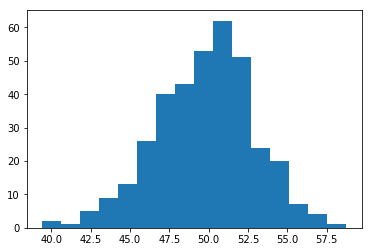

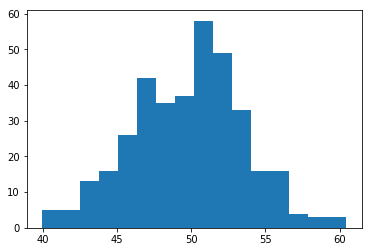

In [113]:
plt.hist(s_ave, bins=16)
plt.show()
plt.hist(s_med, bins=16)
plt.show()
